# ASSIGNMENT : SONAR.CSV CLASSIFICATION

# load data set (pandas)

1) Label Encoding (pandas)

2) shufle dataset (pandas)

3) split training (60) validation (20) and test (20) %

4) Split inputs and labels (output)

5) label one hot coding

6) fit model without validation (compare training and testing acuracies)

7) fit model wit validation (with history)

8) create graph

9) Introduce k-fold, as data is limited

10) tune nework accuracy by ephoc numbers, change of optimizer,



# STEP 1 : Load all the necessary libraries 

In [127]:
import tensorflow as tf
import numpy as np 
import pandas as pd

In [128]:
import matplotlib.pylab as plt

In [129]:
from tensorflow import keras

## load data

In [187]:
sonar_df = pd.read_csv(r"C:\Users\Waleed\Desktop\zain piaic files\piaic-datascience-teaching-master\piaic-datascience-teaching-master\PIAIC-Sir-Anees-Quarter-2\dataset\sonar.csv", header=None)#header none function its change 1st index raw its start zero

In [188]:
sonar_df.head()
#print(sonar_df)
#display(sonar_df)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [189]:
print(len(sonar_df.columns))

61


# Second Step :shufle dataset (pandas)

In [190]:
sonar_df.sample(frac=1).head()#sample function select randomly select any two line[ means return all rows (in random order)].


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
27,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,R
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085,M


In [193]:
#sonar_df = sonar_df.sample(frac=1).reset_index(drop=True)

In [213]:
label = sonar_df[sonar_df.columns[len(sonar_df.columns)-1]]#check length dtype and colums

In [214]:
#label = sonar_df.iloc[:,-7:]
label

0      M
1      M
2      M
3      R
4      R
      ..
203    R
204    R
205    R
206    M
207    M
Name: 60, Length: 208, dtype: object

##### converting column to flatten array

In [215]:
label = np.ravel(label)#its show hows random and real
print(label)

['M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M'
 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R'
 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R'
 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M'
 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M'
 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M'
 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R'
 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M'
 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'M'
 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R'
 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M'
 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M']


# Split inputs and labels (output)

In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit_transform(label,label)
label = le.fit_transform(label)

In [220]:
print(type(label))
print(label)

<class 'numpy.ndarray'>
[0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0]


In [221]:
label = label.astype('float')#because it float type data
#print(label)
print(type(label))

<class 'numpy.ndarray'>


In [225]:
variety = sonar_df.iloc[:, :-1]# we create new varible in sonar_df  
variety

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0654,0.0649,0.0737,0.1132,0.2482,0.1257,0.1797,0.0989,0.2460,0.3422,...,0.0243,0.0210,0.0361,0.0239,0.0447,0.0394,0.0355,0.0440,0.0243,0.0098
1,0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,...,0.0009,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049
2,0.0209,0.0278,0.0115,0.0445,0.0427,0.0766,0.1458,0.1430,0.1894,0.1853,...,0.0133,0.0096,0.0014,0.0049,0.0039,0.0029,0.0078,0.0047,0.0021,0.0011
3,0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0981,0.1016,0.2025,0.0767,...,0.0089,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038
4,0.0235,0.0291,0.0749,0.0519,0.0227,0.0834,0.0677,0.2002,0.2876,0.3674,...,0.0242,0.0083,0.0037,0.0095,0.0105,0.0030,0.0132,0.0068,0.0108,0.0090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0309,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110
204,0.0109,0.0093,0.0121,0.0378,0.0679,0.0863,0.1004,0.0664,0.0941,0.1036,...,0.0124,0.0077,0.0023,0.0117,0.0053,0.0077,0.0076,0.0056,0.0055,0.0039
205,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0135,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079
206,0.0249,0.0119,0.0277,0.0760,0.1218,0.1538,0.1192,0.1229,0.2119,0.2531,...,0.0140,0.0027,0.0068,0.0150,0.0012,0.0133,0.0048,0.0244,0.0077,0.0074


In [226]:
print(type(variety))
variety = variety.values
print(type(variety))
print(variety)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[0.0654 0.0649 0.0737 ... 0.044  0.0243 0.0098]
 [0.0428 0.0555 0.0708 ... 0.0084 0.0113 0.0049]
 [0.0209 0.0278 0.0115 ... 0.0047 0.0021 0.0011]
 ...
 [0.0664 0.0575 0.0842 ... 0.0162 0.0109 0.0079]
 [0.0249 0.0119 0.0277 ... 0.0244 0.0077 0.0074]
 [0.0156 0.021  0.0282 ... 0.0056 0.0048 0.0024]]


In [227]:
print(variety.shape)
print(label.shape)

(208, 60)
(208,)


# Step 3 :split training (70) validation (10) and test (20) %

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
 #first split variety and label 

x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)


In [264]:
#then spliting x_train y_train test size 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1)

# print  train and test shape test 

In [265]:
print("train :",x_train.shape)
print("train label :",y_train.shape)
print("test :",x_test.shape)
print("test label:",y_test.shape)
print("validation :",x_val.shape)
print("validation label :",y_val.shape)

train : (145, 60)
train label : (145,)
test : (42, 60)
test label: (42,)
validation : (21, 60)
validation label : (21,)


# Now traning validation 


(chapter 3: Listing Listing 3.9, 3:11, 3:17, 3:18 3:19, 3:20)





In [266]:
def training_Validation(batch_size,epochs,drop_ratio):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
  
    #bulid neural network
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(60,)),
    tf.keras.layers.Dropout(drop_ratio),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation="relu"),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')])# softmax # sigmoid])
    
    
    #Compilation Step
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
    # fit model wit validation (with history)
    
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val))
    
    
    # evalution step
    evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    
    #Plotting the training and validation loss

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss) + 1)

    #Step 8: create graph
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    


In [267]:
batch_size = 128 # 512 #256  #128
epochs = 70 # 230
drop_ratio = 0.002 #0.02 #0.03 #0.04 # 0.03  #0.001
#training_Validation(batch_size,epochs,drop_ratio)

batch_size : 128 
 epochs : 70 
 drop_ratio : 0.002
Train on 145 samples, validate on 21 samples
Epoch 1/70
145/145 [==============================] - 2s 11ms/sample - loss: 0.6977 - accuracy: 0.4621 - val_loss: 0.6927 - val_accuracy: 0.5238
Epoch 2/70
145/145 [==============================] - 0s 290us/sample - loss: 0.6880 - accuracy: 0.5724 - val_loss: 0.6810 - val_accuracy: 0.6667
Epoch 3/70
145/145 [==============================] - 0s 393us/sample - loss: 0.6821 - accuracy: 0.4828 - val_loss: 0.6795 - val_accuracy: 0.6190
Epoch 4/70
145/145 [==============================] - 0s 248us/sample - loss: 0.6753 - accuracy: 0.5310 - val_loss: 0.6832 - val_accuracy: 0.6667
Epoch 5/70
145/145 [==============================] - 0s 366us/sample - loss: 0.6738 - accuracy: 0.7034 - val_loss: 0.6770 - val_accuracy: 0.7143
Epoch 6/70
145/145 [==============================] - 0s 255us/sample - loss: 0.6682 - accuracy: 0.6483 - val_loss: 0.6636 - val_accuracy: 0.6667
Epoch 7/70
145/145 [========

145/145 [==============================] - 0s 193us/sample - loss: 0.4985 - accuracy: 0.8897 - val_loss: 0.5414 - val_accuracy: 0.8095
Epoch 56/70
145/145 [==============================] - 0s 172us/sample - loss: 0.5096 - accuracy: 0.8828 - val_loss: 0.5209 - val_accuracy: 0.8095
Epoch 57/70
145/145 [==============================] - 0s 172us/sample - loss: 0.4922 - accuracy: 0.8897 - val_loss: 0.4899 - val_accuracy: 0.7619
Epoch 58/70
145/145 [==============================] - 0s 200us/sample - loss: 0.4825 - accuracy: 0.8138 - val_loss: 0.5007 - val_accuracy: 0.7619
Epoch 59/70
145/145 [==============================] - 0s 179us/sample - loss: 0.5079 - accuracy: 0.7448 - val_loss: 0.4981 - val_accuracy: 0.7619
Epoch 60/70
145/145 [==============================] - 0s 207us/sample - loss: 0.4961 - accuracy: 0.7517 - val_loss: 0.4903 - val_accuracy: 0.8095
Epoch 61/70
145/145 [==============================] - 0s 317us/sample - loss: 0.4790 - accuracy: 0.8138 - val_loss: 0.4996 - val_

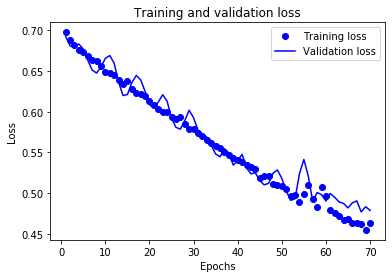

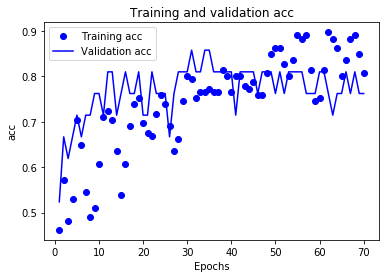

Test loss : 56.58215284347534 %
Test accuracy : 69.04761791229248 %


In [260]:
training_Validation(batch_size,epochs,drop_ratio)

# training on (k-fold on,training & Validation)

In [281]:
# split in training 80%, test 20% test 
x_train, x_test, y_train, y_test = train_test_split(variety, label, test_size=0.2, random_state=1)

def kfold_training_Validation(batch_size,epochs,drop_ratio,split):
    print("batch_size :",batch_size,"\n","epochs :",epochs,"\n","drop_ratio :",drop_ratio) 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(60,)),
        tf.keras.layers.Dropout(drop_ratio),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=split)
    kf.get_n_splits()
    
    # K-fold not using correctly
    
    for train_index, test_index in kf.split(x_train):
        x_train1, x_test1 = x_train[train_index], x_train[test_index]
        y_train1, y_test1 = y_train[train_index], y_train[test_index] 

    history = model.fit(x_train1, y_train1,batch_size=batch_size,epochs=epochs,verbose=1)
    
    
    evaluation = model.evaluate(x_test1,  y_test1,batch_size=batch_size, verbose=2)
    print()
    print("Test loss :",evaluation[0]*100,"%")
    print("Test accuracy :",evaluation[1]*100,"%")
    
    
    
    

In [282]:
# Training and Validation (K-Fold)
batch_size = 128 #512  #128 # 32 , 128 , 256
epochs = 130
drop_ratio = 0.001 # 0.001    # 0.001, 0.9, 0.75, 0.75, 0.5, 0.5, 0.5
split = 6
kfold_training_Validation(batch_size,epochs,drop_ratio,split)

batch_size : 128 
 epochs : 130 
 drop_ratio : 0.001
Train on 139 samples
Epoch 1/130
139/139 [==============================] - 1s 8ms/sample - loss: 0.6758 - accuracy: 0.5252
Epoch 2/130
139/139 [==============================] - 0s 1ms/sample - loss: 0.6483 - accuracy: 0.5396
Epoch 3/130
139/139 [==============================] - 0s 417us/sample - loss: 0.6589 - accuracy: 0.5324
Epoch 4/130
139/139 [==============================] - 0s 727us/sample - loss: 0.6588 - accuracy: 0.5324
Epoch 5/130
139/139 [==============================] - 0s 532us/sample - loss: 0.6425 - accuracy: 0.5396
Epoch 6/130
139/139 [==============================] - 0s 460us/sample - loss: 0.6237 - accuracy: 0.6475
Epoch 7/130
139/139 [==============================] - 0s 158us/sample - loss: 0.6187 - accuracy: 0.7554
Epoch 8/130
139/139 [==============================] - 0s 151us/sample - loss: 0.6195 - accuracy: 0.7770
Epoch 9/130
139/139 [==============================] - 0s 252us/sample - loss: 0.6078 - ac

Epoch 77/130
139/139 [==============================] - 0s 130us/sample - loss: 0.3108 - accuracy: 0.8705
Epoch 78/130
139/139 [==============================] - 0s 122us/sample - loss: 0.3212 - accuracy: 0.8417
Epoch 79/130
139/139 [==============================] - 0s 94us/sample - loss: 0.3047 - accuracy: 0.8921
Epoch 80/130
139/139 [==============================] - 0s 216us/sample - loss: 0.3089 - accuracy: 0.9065
Epoch 81/130
139/139 [==============================] - 0s 115us/sample - loss: 0.3090 - accuracy: 0.9065
Epoch 82/130
139/139 [==============================] - 0s 130us/sample - loss: 0.2905 - accuracy: 0.9137
Epoch 83/130
139/139 [==============================] - 0s 130us/sample - loss: 0.3184 - accuracy: 0.8489
Epoch 84/130
139/139 [==============================] - 0s 137us/sample - loss: 0.3000 - accuracy: 0.8777
Epoch 85/130
139/139 [==============================] - 0s 309us/sample - loss: 0.3060 - accuracy: 0.8921
Epoch 86/130
139/139 [=========================